# BL40A2010 Introduction to IoT-Based Systems

## Assignment 4, 21.2.2023

### Author: Touko Tikkanen

In [1]:
# installations
! pip install scikit-dsp-comm
! pip install --upgrade numpy
! pip install --upgrade matplotlib
! pip install --upgrade networkx
! pip install --upgrade pandas

import networkx as nx 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates 

import scipy as sp
import numpy as np
import pandas as pd 

**(1) Draw a graph with star topology with five nodes (one in the center $A$, four in the edges $B$-$E$).
If the topology is directed as a many-to-one topology, write the structure of awareness of the system, considering that nodes $B$-$E$ acquire and process data about a supporting reality $T$, while $A$ can only receive data from it. Remember the notation $Xy$ means the image of $X$ by $Y$.**

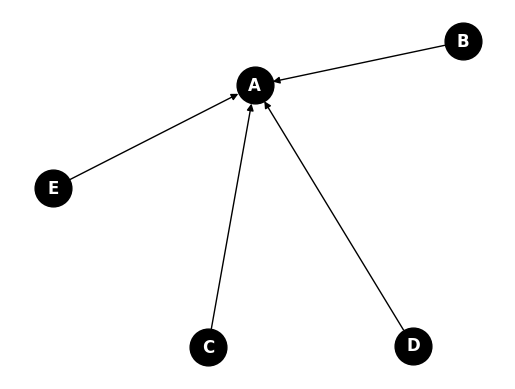

In [2]:
G = nx.Graph()

# 5 node star
G.add_nodes_from(["A", "B", "C", "D", "E"])

G = G.to_directed()

G.add_edge("B", "A")
G.add_edge("C", "A")
G.add_edge("D", "A")
G.add_edge("E", "A")

nx.draw_networkx(G, node_color='black', font_color='white', edge_color='black', font_weight='bold',  node_size=700)
plt.axis('off')
plt.show()

Reflexive system: $\Omega = T+Tb+Tc+Td+Te+Tba+Tca+Tda+Tea = T(1+b+c+d+e+ba+ca+da+ea) $

Therefore the structure of awareness is $\omega = 1+b+c+d+e+ba+ca+da+ea$

**(2) Assume that graph illustrate a scenario of four sensor nodes that also (pre-)process data and one aggregator node as follows. Nodes $B$ and $C$ monitor temperature and wind speed at Airport station in Lappeenranta, respectively. Nodes $D$ and $E$ monitor temperature and wind speed at Lepola station in Lappeenranta, respectively. Nodes $B$ and $D$ send a binary message to $A$ indicating if during that period the temperature was more than $25$ degrees ("1" means above, "0" means below or equal to). Likewise nodes $C$ and $E$ send a binary message to $A$ indicating if during that period the wind speed was more than $5$ m/s ("1" means above, "0" means below or equal to). Download and plot the data from [FMI](http://en.ilmatieteenlaitos.fi/download-observations\#!/) with 1 hour resolution during July, 2018. Using this data, plot the binary signals sent from the nodes $B$-$E$ to the aggregator $A$.**

In [3]:
data_BC = pd.read_csv("lappeenranta_airport2018july.csv",dayfirst=True,sep=",",
                           header=0,decimal=b".",index_col=0, 
                           parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5,6]);

data_DE = pd.read_csv("lappeenranta_lepola2018july.csv",dayfirst=True,sep=",",
                           header=0,decimal=b".",index_col=0, 
                           parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5,6]);

data_BC.info()
#data_DE.info()

# convert DE to numeric
data_DE['Wind speed (m/s)'] = pd.to_numeric(data_DE['Wind speed (m/s)'], errors='coerce');

#data_DE.info()
#data_DE['Wind speed (m/s)'].values 

# 5 values are missing
data_DE = data_DE.fillna(method="ffill") # use last observation when NaN
data_DE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 745 entries, 2018-07-01 00:00:00 to 2018-08-01 00:00:00
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Air temperature (degC)  745 non-null    float64
 1   Wind speed (m/s)        745 non-null    float64
dtypes: float64(2)
memory usage: 17.5 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 745 entries, 2018-07-01 00:00:00 to 2018-08-01 00:00:00
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Air temperature (degC)  745 non-null    float64
 1   Wind speed (m/s)        745 non-null    float64
dtypes: float64(2)
memory usage: 17.5 KB


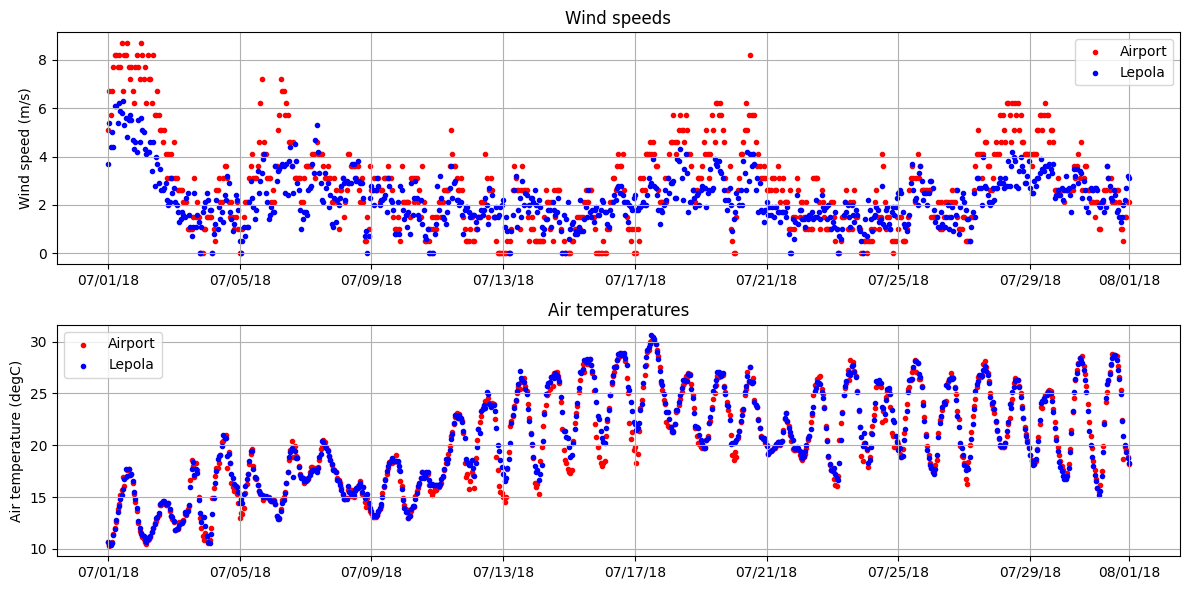

In [95]:
# Nodes
data_B = data_BC['Air temperature (degC)'].values;
data_D = data_DE['Air temperature (degC)'].values;

data_C = data_BC['Wind speed (m/s)'].values;
data_E = data_DE['Wind speed (m/s)'].values;


# Plotting ---------------------------------------------------
plt.rcParams['figure.figsize'] = 12, 6
fig, (ax1, ax2) = plt.subplots(2,1)

# wind speed
ax1.scatter(data_BC.index, data_C, label="Airport", color='red', marker='.')
ax1.scatter(data_DE.index, data_E, label="Lepola", color='blue', marker='.')

ax1.legend()
ax1.set_title("Wind speeds") 
ax1.set_ylabel("Wind speed (m/s)") 
ax1.grid(True)

# air temp
ax2.scatter(data_BC.index, data_B, label="Airport", color='red', marker='.')
ax2.scatter(data_DE.index, data_D, label="Lepola", color='blue', marker='.')

ax2.legend()
ax2.set_title("Air temperatures") 
ax2.set_ylabel("Air temperature (degC)") 
ax2.grid(True)
ax2.axis('tight')


# format x ticks
xfmt = mdates.DateFormatter('%D')
ax1.xaxis.set_major_formatter(xfmt)
ax2.xaxis.set_major_formatter(xfmt)

fig.tight_layout()

In [98]:
# signals to A

data_A = np.zeros([data_B.size, 4])

for i in np.arange(0, data_B.size):
    
    if data_B[i] > 25:
        data_A[i,0] = 1
        
    if data_D[i] > 25:
        data_A[i,2] = 1
        
    if data_C[i] > 5:
        data_A[i,1] = 1
        
    if data_E[i] > 5:
        data_A[i,3] = 1
        
data_A

array([[0., 1., 0., 0.],
       [0., 1., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

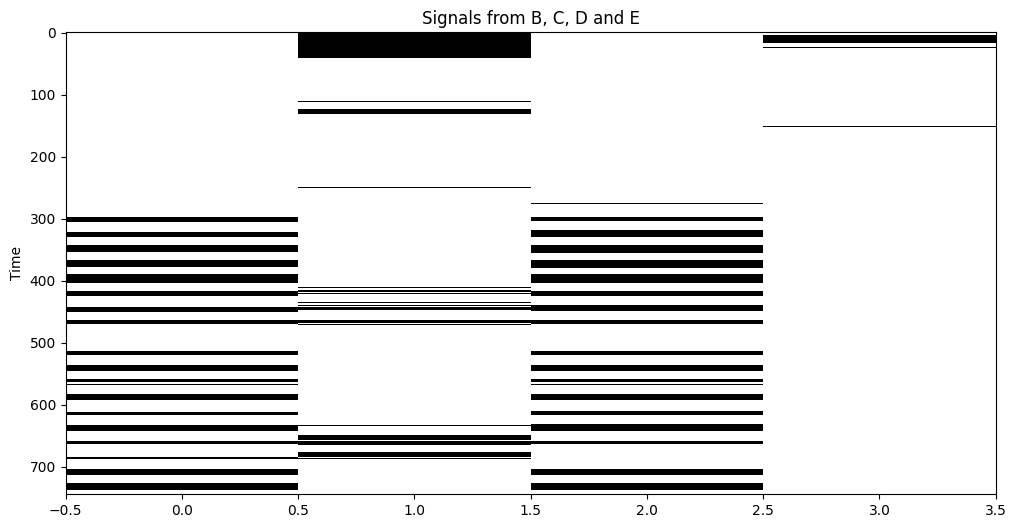

In [99]:
fig, ax = plt.subplots()

ax.imshow(data_A, cmap='Greys',interpolation='nearest',aspect='auto')
ax.set_title('Signals from B, C, D and E')
ax.set_ylabel('Time')
plt.show()

**(3) Node $A$ needs to identify risky situations in Lappeenranta when the temperature is above $25$ degrees and the wind is above $5$ m/s based on the sensors' signals. If a risky situation is identified at node $A$ as binary number "1" while normal situations as "0". How would you solve this problem? Plot the output signal from node $A$ and discuss its relation to the input signals from $B$-$E$.**

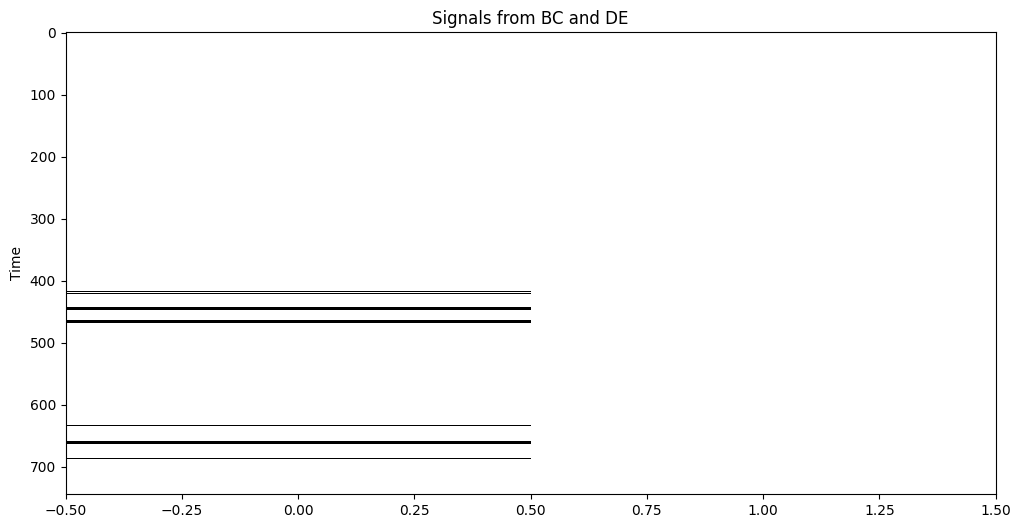

In [106]:
# two locations
risk_A = np.zeros([data_B.size, 2])

for i in np.arange(0, data_B.size):
    
    if data_B[i] > 25 and data_C[i] > 5:
        risk_A[i,0] = 1
        
    if data_D[i] > 25 and data_E[i] > 5:
        risk_A[i,1] = 1

        
fig, ax = plt.subplots()

ax.imshow(risk_A, cmap='Greys',interpolation='nearest',aspect='auto')
ax.set_title('Signals from BC and DE')
ax.set_ylabel('Time')
plt.show()

# Few risky situations in BC (Airport), none in DE (Lepola)